In [18]:
from openai import OpenAI
import openai

# Replace with your actual API key
# api_key = ""
client = OpenAI()

query = f"""Problem Statement: Use LLMs for identifying the table and Key Value(KV) from provided invoices samples. We will be providing api keys for OpenAI to individual teams, with strong monitoring in the usage. If highly overused by any participants, we hold the right to disqualify them from the competition. So we request you to make the openai call carefully. 

KV: For KV, you are required to extract bbox and text for the following keys:
Invoice Number
Issue Date
Total
Table: For Table, you are required to identify the table bbox and table text.

Evaluation Criteria: 


The evaluation will be done via the mean of the kv and table extraction.
For KV, the extracted text is compared with ground truth text and fuzzy match should be > 80%. The bbox IOU should also be > 80%. This criteria should be crossed for each 3 KV field. Then, it is considered as a correct KV extraction i.e KV = 1.
For the table, the extracted table text will be compared with the ground truth text. The fuzzy match between these should be > 80%. And IOU of the table bbox > 80% with the ground truth to be considered as a valid extraction i.e, Table = 1.
For eg, for a single document:
If KV = 1 , Table = 1: the extraction score is 1 
If KV = 0, Table = 1, the extraction score is 0.5
In the similar fashion, the score is calculated for all the documents and then the final score is calculated by taking the mean of it.
"""

# Replace with the actual student's answer image URL
student_answer_image_url = "https://raw.githubusercontent.com/thenaivekid/autograder/main/sample%20student%20answer.jpg?token=GHSAT0AAAAAACJ6HTOOXTTITVSN46663QMWZLKVEEA"

# Create a request to the OpenAI API
response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": f"""**Role:** System

                    *Content:* 
                    {query}
                    """
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": """https://parade.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTkwNTc1ODgzNTIyODExMDA1/all-that-you-will-be.webp"""
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

# Print the response
print(response.choices[0])


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
from openai import OpenAI
client = OpenAI()

query = "hi"
response = client.chat.completions.create(
  model="gpt-4-0613",
  # response_format={ "type": "json_object" },
  messages=[
    {"role": "system", "content": f"you are a helpful assistant"},
    {"role": "user", "content": f"{query}"}
  ]
)
print(response.choices[0].message.content)

Hello! How can I assist you today?


In [ ]:
from PyPDF2 import PdfReader

def read_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    number_of_pages = len(reader.pages)
    text = ""
    for i in range(number_of_pages):
        page = reader.pages[i]
        text = page.extract_text()
    return text

pdf_path = '1040_file_1.pdf'
result_text = read_pdf(pdf_path)
print(result_text)

Form1040 2022 U.S. Individual Income Tax Return Department of the Treasury—Internal Revenue Service 
OMB No. 1545-0074 IRS Use Only—Do not write or staple in this space. 
Filing Status   
Check only 
one box.Single Married filing jointly Married filing separately (MFS) Head of household (HOH) Qualifying surviving 
spouse (QSS)
If you checked the MFS box, enter the name of your spouse. If you checked the HOH or QSS box, enter the child’s name if the qualifying 
person is a child but not your dependent: 
Your first name and middle initial Last name Your social security number 
If joint return, spouse’s first name and middle initial Last name Spouse’s social security number
Home address (number and street). If you have a P.O. box, see instructions. Apt. no. 
City, town, or post office. If you have a foreign address, also complete spaces below. State ZIP code
Foreign country name                                        Foreign province/state/county                        Foreign postal code

In [ ]:
from PyPDF2 import PdfReader

def read_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    number_of_pages = len(reader.pages)
    text = ""
    for i in range(number_of_pages):
        page = reader.pages[i]
        text = page.extract_text()
    return text

pdf_path = 'samplepdf.pdf'
result_text = read_pdf(pdf_path)
print(result_text)

In [ ]:
from PyPDF2 import PdfReader
import svgwrite

pdf_path = '1040_file_1.pdf'

reader = PdfReader(pdf_path)
page = reader.pages[0]

dwg = svgwrite.Drawing("GeoBase_test.svg", profile="tiny")


def visitor_svg_rect(op, args, cm, tm):
    if op == b"re":
        (x, y, w, h) = (args[i].as_numeric() for i in range(4))
        dwg.add(dwg.rect((x, y), (w, h), stroke="red", fill_opacity=0.05))


def visitor_svg_text(text, cm, tm, fontDict, fontSize):
    (x, y) = (tm[4], tm[5])
    dwg.add(dwg.text(text, insert=(x, y), fill="blue"))


# page.extract_text(
#     visitor_operand_before=visitor_svg_rect, visitor_text=visitor_svg_text
# )
page.extract_text(
    visitor_operand_before=visitor_svg_rect
)
dwg.save()

In [ ]:
# from PyPDF2 import PdfReader

# def extract_information(pdf_path):
#     with open(pdf_path, 'rb') as file:
#         pdf = PdfReader(file)
#         info = pdf.
#         number_of_pages = pdf.getNumPages()

#     txt = f"""
#     Information about {pdf_path}: 

#     Author: {info.author}
#     Creator: {info.creator}
#     Producer: {info.producer}
#     Subject: {info.subject}
#     Title: {info.title}
#     Number of pages: {number_of_pages}
#     """

#     print(txt)
    
# pdf_path = '1040_file_1.pdf'

    
# info = extract_information(pdf_path)

DeprecationError: getDocumentInfo is deprecated and was removed in PyPDF2 3.0.0. Use metadata instead.

In [ ]:
import fitz

def extract_form_information(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)

    # Get the number of pages in the PDF
    num_pages = pdf_document.page_count

    # Dictionary to store form field values
    form_data = {}

    # Loop through each page
    for page_number in range(num_pages):
        page = pdf_document.load_page(page_number)

        print(page)
        # form_fields = page.get_text("dict")["text"]["field"]
        form_fields = None

        # # Loop through form fields and extract values
        # for field_name, field_info in form_fields.items():
        #     field_value = field_info["value"]
        #     form_data[field_name] = field_value

    # Close the PDF file
    pdf_document.close()

    return form_data

# Example usage
pdf_path = "1040_file_1.pdf"
result = extract_form_information(pdf_path)

# Print the extracted form data
for field_name, field_value in result.items():
    print(f"{field_name}: {field_value}")


page 0 of 1040_file_1.pdf


In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("1040_file_1.png")
type(image)

PIL.PngImagePlugin.PngImageFile

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("1040_file_1.jpg")
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [28]:
import os
def convert_pdf_to_jpg(filename, dir):
    doc = fitz.open(os.path.join(dir, filename))
    pix = doc[0].get_pixmap()
    jpg_file = os.path.splitext(filename)[0] + '.jpg'
    pix.save(os.path.join(dir, "jpg", jpg_file))
    print(f"{filename} converted and save as jpg")

In [30]:
convert_pdf_to_jpg("1040_file_2.pdf", "")

1040_file_2.pdf converted and save as jpg


In [31]:
import cv2
import matplotlib.pyplot as plt
image1 = cv2.imread("jpg/1040_file_2.jpg")
# print(type(image1))
# image2 = cv2.imread("1040_file_1.png")
# print(type(image2))

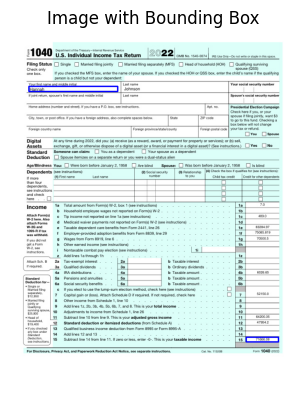

In [33]:
bbox = [111.9,329.1,639.7,361.1]
bbox = [1404.1,1819.8,1596,1848.5]

scaling_factor = 612 / 1700.0
bbox = [int(box * scaling_factor) for box in bbox]
cv2.rectangle(image1, bbox[:2], bbox[2:], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image with Bounding Box')
plt.axis('off')  # Turn off axis labels
plt.show()

In [19]:
import fitz
import os

dpi = 300
zoom = dpi / 72

path = "1040_file_2.pdf"

doc = fitz.open(path)

# Replace this with the actual bounding box data from your dataset
# For now, using a sample bounding box with a maximum width of 1600.8
sample_bounding_boxes = [[0, 0, 1600.8, 100]]

# Calculate the scaling factor based on the maximum width of bounding boxes
scaling_factor = 612 / 1700.0  # Adjust this based on your dataset

# magnify = fitz.Matrix(zoom * scaling_factor, zoom * scaling_factor)

for page in doc:
    pix = page.get_pixmap()
    pix.save(f"1040_file_2.jpg")


612.0 792.0


In [26]:
import os

directory = r"C:\Users\Acer\codes\ai_competition_it_meet\Docsumo - IT MEET-20231205T023449Z-001\Docsumo - IT MEET\Data Extraction\Train Files"
pdf_files = [file for file in os.listdir(directory) if file.lower().endswith('.pdf')]
len(pdf_files)

160

In [ ]:


def resize_image_and_bbox(image, bboxes, target_size):
  """
  bbox: (x0,y0,x1,y1)
  target_size: (height,width)
  """
  resized_image = cv2.resize(image, target_size)
  scale_y = target_size[0] / image.shape[0]
  scale_x = target_size[1] / image.shape[1]

  resized_bboxes = []
  for bbox in bboxes:
    x, y, x1, y1 = normalize_bbox(bbox)
    x *= scale_x
    x1 *= scale_x
    y *= scale_y
    y1 *= scale_y
    resized_bboxes.append([x, y, x1, y1])

    return resized_image, resized_bboxes